#**Exploratory Data Analysis fro Relive App Review**
A continuation from the review scraping in `01-relive-reviews-scrapping.ipynb`, which you can access [here](https://colab.research.google.com/drive/1SwxCon8mol6n1qem_K8GqWK6VzLF33JW?usp=sharing)

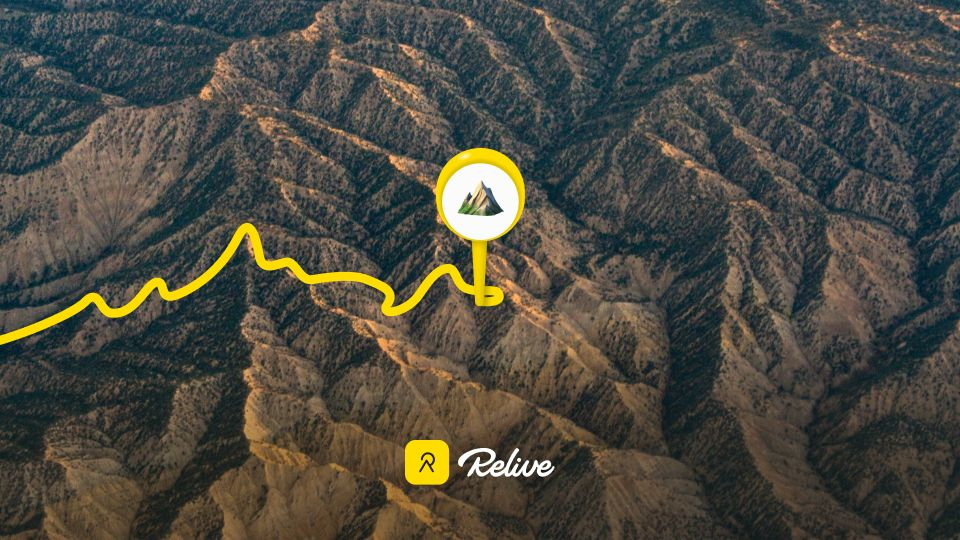


---



##Library import and instalation

In [12]:

!pip install matplotlib

In [93]:
import sklearn
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans']

##Load dataset

In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
df_reliverev = pd.read_csv('/content/drive/My Drive/Data/df_reliverev')
df_reliverev.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,71f966cc-b905-4d92-9662-267512516332,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Good app, but I wish for upgrade in UI and som...",4,0,5.57.0,2025-03-11 11:58:45,NaN,NaN,5.57.0
1,7554edbe-d8bc-4a4a-aaa7-3d9c7112a493,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,accurate details,4,0,5.57.0,2025-03-11 00:24:19,NaN,NaN,5.57.0
2,2eaa87c0-38d1-4a23-a7c7-81a74dda90ca,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Paid for this last year at 50% off, its just r...",2,0,5.57.0,2025-03-10 14:14:45,NaN,NaN,5.57.0
3,bfecffd5-233c-48c0-8b70-7fc1cf66912a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"It's a very good application for me, so try it...",5,0,5.57.0,2025-03-10 12:45:46,NaN,NaN,5.57.0
4,d238c089-b972-4155-abdb-b26a5f285134,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Ohsem,5,0,5.57.0,2025-03-09 05:45:56,NaN,NaN,5.57.0


##Get data information and overview

In [96]:
#try to get structure information from the df
df_reliverev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21621 entries, 0 to 21620
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              21621 non-null  object
 1   userName              21621 non-null  object
 2   userImage             21621 non-null  object
 3   content               21619 non-null  object
 4   score                 21621 non-null  int64 
 5   thumbsUpCount         21621 non-null  int64 
 6   reviewCreatedVersion  20363 non-null  object
 7   at                    21621 non-null  object
 8   replyContent          653 non-null    object
 9   repliedAt             653 non-null    object
 10  appVersion            20363 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.8+ MB


In [97]:
#We do not need data for column reviewId, userName, userImage so we will show only these column
df_reliverev.loc[:,["content","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]

,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,"Good app, but I wish for upgrade in UI and som...",4,0,5.57.0,2025-03-11 11:58:45,NaN,NaN
1,accurate details,4,0,5.57.0,2025-03-11 00:24:19,NaN,NaN
2,"Paid for this last year at 50% off, its just r...",2,0,5.57.0,2025-03-10 14:14:45,NaN,NaN
3,"It's a very good application for me, so try it...",5,0,5.57.0,2025-03-10 12:45:46,NaN,NaN
4,Ohsem,5,0,5.57.0,2025-03-09 05:45:56,NaN,NaN
...,...,...,...,...,...,...,...
21616,Awesome.. has all my rides,5,0,1.0,2017-03-26 05:55:08,NaN,NaN
21617,"So far, very good.",5,0,1.0,2017-03-26 01:39:03,NaN,NaN
21618,Love the app. Fantastic....,5,0,1.0,2017-03-25 08:24:47,NaN,NaN
21619,"Brilliant, just what was needed adding the app...",5,1,1.0,2017-03-23 18:20:09,NaN,NaN


##Explore the Descriptive Statistics and Visualizations

###Checking the Count of Reviews Based on Given Scores

In [98]:
#Check number of reviews scores
count = df_reliverev['score'].value_counts()
df_count = pd.DataFrame(count)
df_count

,count
score,
5,16383
4,2578
1,1325
3,816
2,519


###Bar Plot Showing the Relationship Between Scores and Review Counts

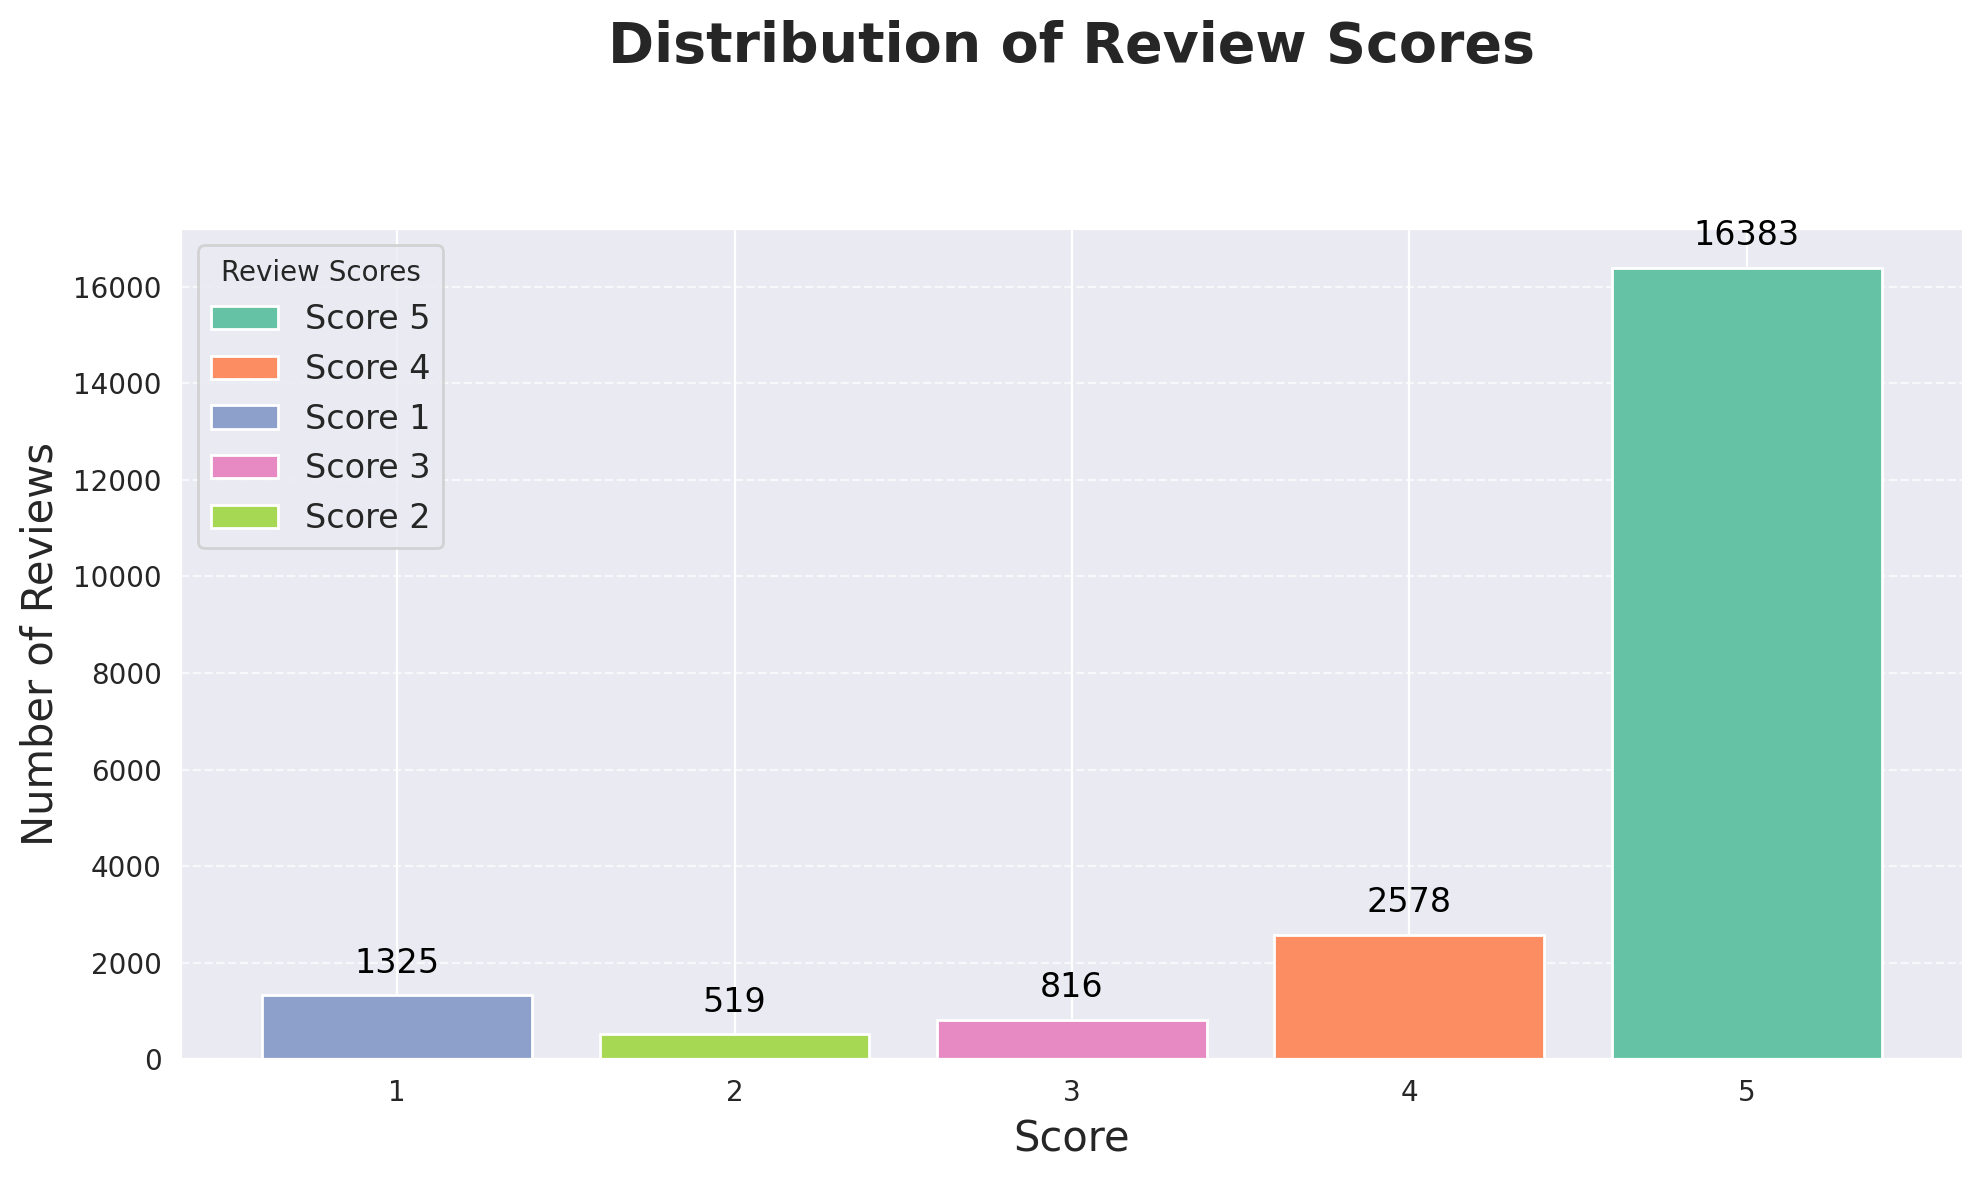

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust the plot size
plt.figure(figsize=(10, 6))

# Define a color palette
palette = sns.color_palette("Set2", len(df_count))  # Set2 palette

# Create the bar plot with different colors for each score category
bars = plt.bar(df_count.index, df_count['count'], color=palette)

# Add axis labels and title
plt.title('Distribution of Review Scores', fontsize=20, fontweight='bold', pad=60) # Menambah pad ke 60
plt.xlabel('Score', fontsize=15)
plt.ylabel('Number of Reviews', fontsize=15)


# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add score labels above the bars
for bar in bars:
    yval = bar.get_height() # Get the height of the bar (the count value)
    xval = bar.get_x() + bar.get_width() / 2 # Calculate the horizontal center of the bar

    # Place the text label
    plt.text(xval, # X-coordinate: center of the bar
             yval + max(df_count['count']) * 0.02, # Y-coordinate: just above the bar
             str(yval), # The text to display (the count value)
             ha='center', # Horizontal alignment: center the text
             va='bottom', # Vertical alignment: align the bottom of the text with yval + offset
             fontsize=12,
             color='black')
# Add a legend (this is optional and could be removed if you don't need it)
plt.legend(bars, [f'Score {score}' for score in df_count.index], title='Review Scores', loc='upper left', fontsize=12)

# Show the plot
plt.tight_layout()  # Ensure everything fits within the plot
plt.show()


###Change the Data Type of the 'at' Column from Object to Datetime

In [100]:
# Converting 'at' column to datetime objects
df_reliverev['at'] = pd.to_datetime(df_reliverev['at'])
df_reliverev.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21621 entries, 0 to 21620
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              21621 non-null  object        
 1   userName              21621 non-null  object        
 2   userImage             21621 non-null  object        
 3   content               21619 non-null  object        
 4   score                 21621 non-null  int64         
 5   thumbsUpCount         21621 non-null  int64         
 6   reviewCreatedVersion  20363 non-null  object        
 7   at                    21621 non-null  datetime64[ns]
 8   replyContent          653 non-null    object        
 9   repliedAt             653 non-null    object        
 10  appVersion            20363 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 1.8+ MB


### Other corelation visualization

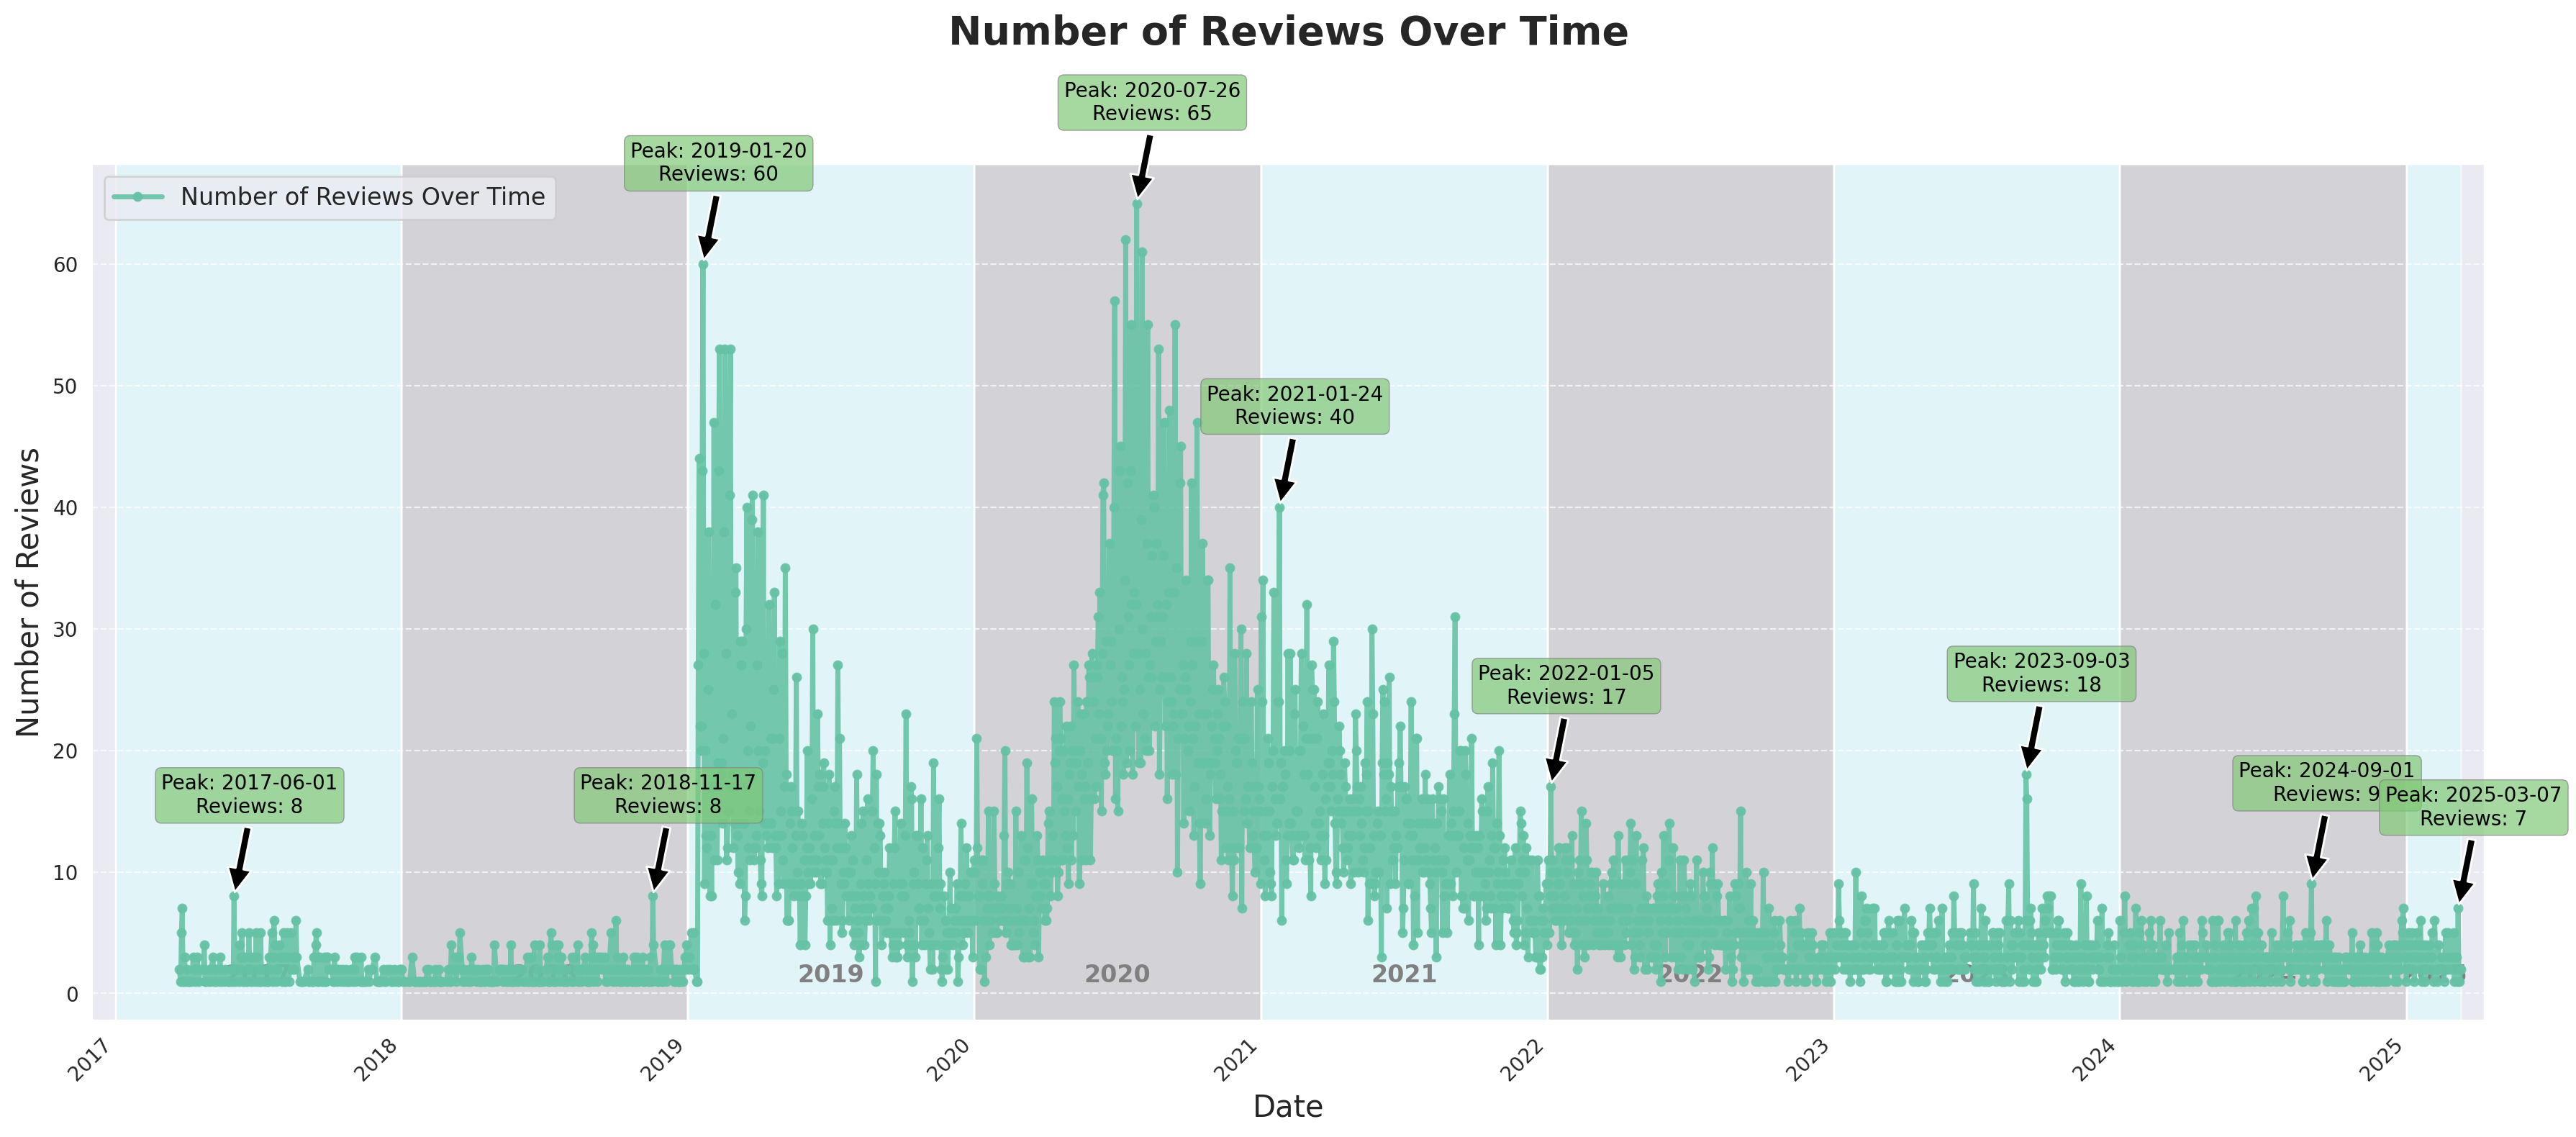

In [101]:
from scipy.signal import find_peaks

plt.figure(figsize=(18, 8))

reviews_over_time = df_reliverev.groupby(df_reliverev['at'].dt.date).size()

# Convert the index to datetime objects if it's not already
reviews_over_time.index = pd.to_datetime(reviews_over_time.index)

# Get unique years from the datetime index
years = reviews_over_time.index.year.unique().sort_values()

# Get the current axes
ax = plt.gca()

# Add yearly dividers (shaded areas)
# Alternating colors for better visual separation
colors = ['#daffff', '#bdbdbd'] # Light blue and light grey
for i, year in enumerate(years):
    start_of_year = pd.Timestamp(f'{year}-01-01')
    end_of_year = pd.Timestamp(f'{year}-12-31')

    # Ensure the end_of_year does not exceed the last date in reviews_over_time
    if end_of_year > reviews_over_time.index.max():
        end_of_year = reviews_over_time.index.max()

    ax.axvspan(start_of_year, end_of_year,
               facecolor=colors[i % 2],
               alpha=0.5,
               zorder=0) # Pastikan di belakang garis plot

    # Optional: Add year label in the middle of the shaded area
    year_mid_date = start_of_year + (end_of_year - start_of_year) / 2
    ax.text(year_mid_date, ax.get_ylim()[1] * 0.95, # Posisi teks di bagian atas plot
            str(year),
            horizontalalignment='center',
            fontsize=12,
            fontweight='bold',
            color='gray',
            zorder=1)

# Create the line plot with a label for the legend
plt.plot(reviews_over_time.index, reviews_over_time.values,
         color=sns.color_palette("Set2")[0], # Menggunakan warna pertama dari palette Set2
         linewidth=2.5, # Sedikit lebih tebal
         marker='o', # Menambahkan marker pada setiap titik data
         markersize=4, # Ukuran marker yang lebih kecil untuk data yang padat
         alpha=0.9, # Sedikit lebih opaque
         label='Number of Reviews Over Time',
         zorder=2) # Pastikan di atas shaded area

# Add axis labels and title
plt.title('Number of Reviews Over Time', fontsize=20, fontweight='bold', pad=60) # Menambah pad ke 60
plt.xlabel('Date', fontsize=15)
plt.ylabel('Number of Reviews', fontsize=15)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Remove x-axis gridlines as axvspan will serve as year divider
# plt.grid(axis='x', linestyle='--', alpha=0.5)

# Label yearly peaks (highest month of reviews per year)
peak_labels = []
for year in years:
    year_data = reviews_over_time[reviews_over_time.index.year == year]
    if not year_data.empty:
        # Find the peak (date with max reviews) for the current year
        yearly_peak_date = year_data.idxmax()
        yearly_peak_value = year_data.max()

        # --- PERUBAHAN DI SINI: Format teks label puncak menyertakan tanggal lengkap ---
        label_text = f'Peak: {yearly_peak_date.strftime("%Y-%m-%d")}\nReviews: {int(yearly_peak_value):,}'

        # Calculate text position
        y_offset = np.max(reviews_over_time.values) * 0.10 # Offset y sesuai gaya sebelumnya

        peak_labels.append({
            'date': yearly_peak_date,
            'value': yearly_peak_value,
            'text': label_text,
            # Posisi teks anotasi (geser 20 hari ke kanan)
            'xytext': (yearly_peak_date + pd.Timedelta(days=20), yearly_peak_value + y_offset)
        })

# Refine peak label positions to prevent overlaps (basic approach)
peak_labels.sort(key=lambda x: x['date'])

for i in range(len(peak_labels)):
    current_label = peak_labels[i]
    for j in range(i + 1, len(peak_labels)):
        next_label = peak_labels[j]

        if abs((current_label['date'] - next_label['date']).days) < 60:
            if current_label['xytext'][1] >= next_label['xytext'][1]:
                next_label['xytext'] = (next_label['xytext'][0], current_label['xytext'][1] + np.max(reviews_over_time.values) * 0.05)


for label_data in peak_labels:
    plt.annotate(label_data['text'],
                 xy=(label_data['date'], label_data['value']), # Titik yang akan dianotasi
                 xytext=label_data['xytext'], # Posisi teks anotasi yang sudah disesuaikan
                 arrowprops=dict(facecolor='black', shrink=0.05), # Properti panah (dikembalikan ke gaya sebelumnya)
                 fontsize=10, # Ukuran font sesuai gaya sebelumnya
                 color='black', # Warna teks anotasi (merah)
                 bbox=dict(boxstyle="round,pad=0.3", fc="#81c977", ec="gray", lw=0.5, alpha=0.7), # Kotak latar belakang anotasi (kuning)
                 ha='center', # Penjajaran horizontal teks
                 va='bottom', # Penjajaran vertikal teks
                 zorder=3) # Pastikan di atas garis plot

# Add a legend for the line plot
plt.legend(loc='upper left', fontsize=12)

# Set x-axis major ticks to display yearly intervals and format them
ax.xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

# Menambahkan padding di sekitar plot agar label tidak terpotong
plt.margins(x=0.01, y=0.05)

# Show the plot
plt.tight_layout() # Memastikan semua elemen pas dalam plot
plt.show()


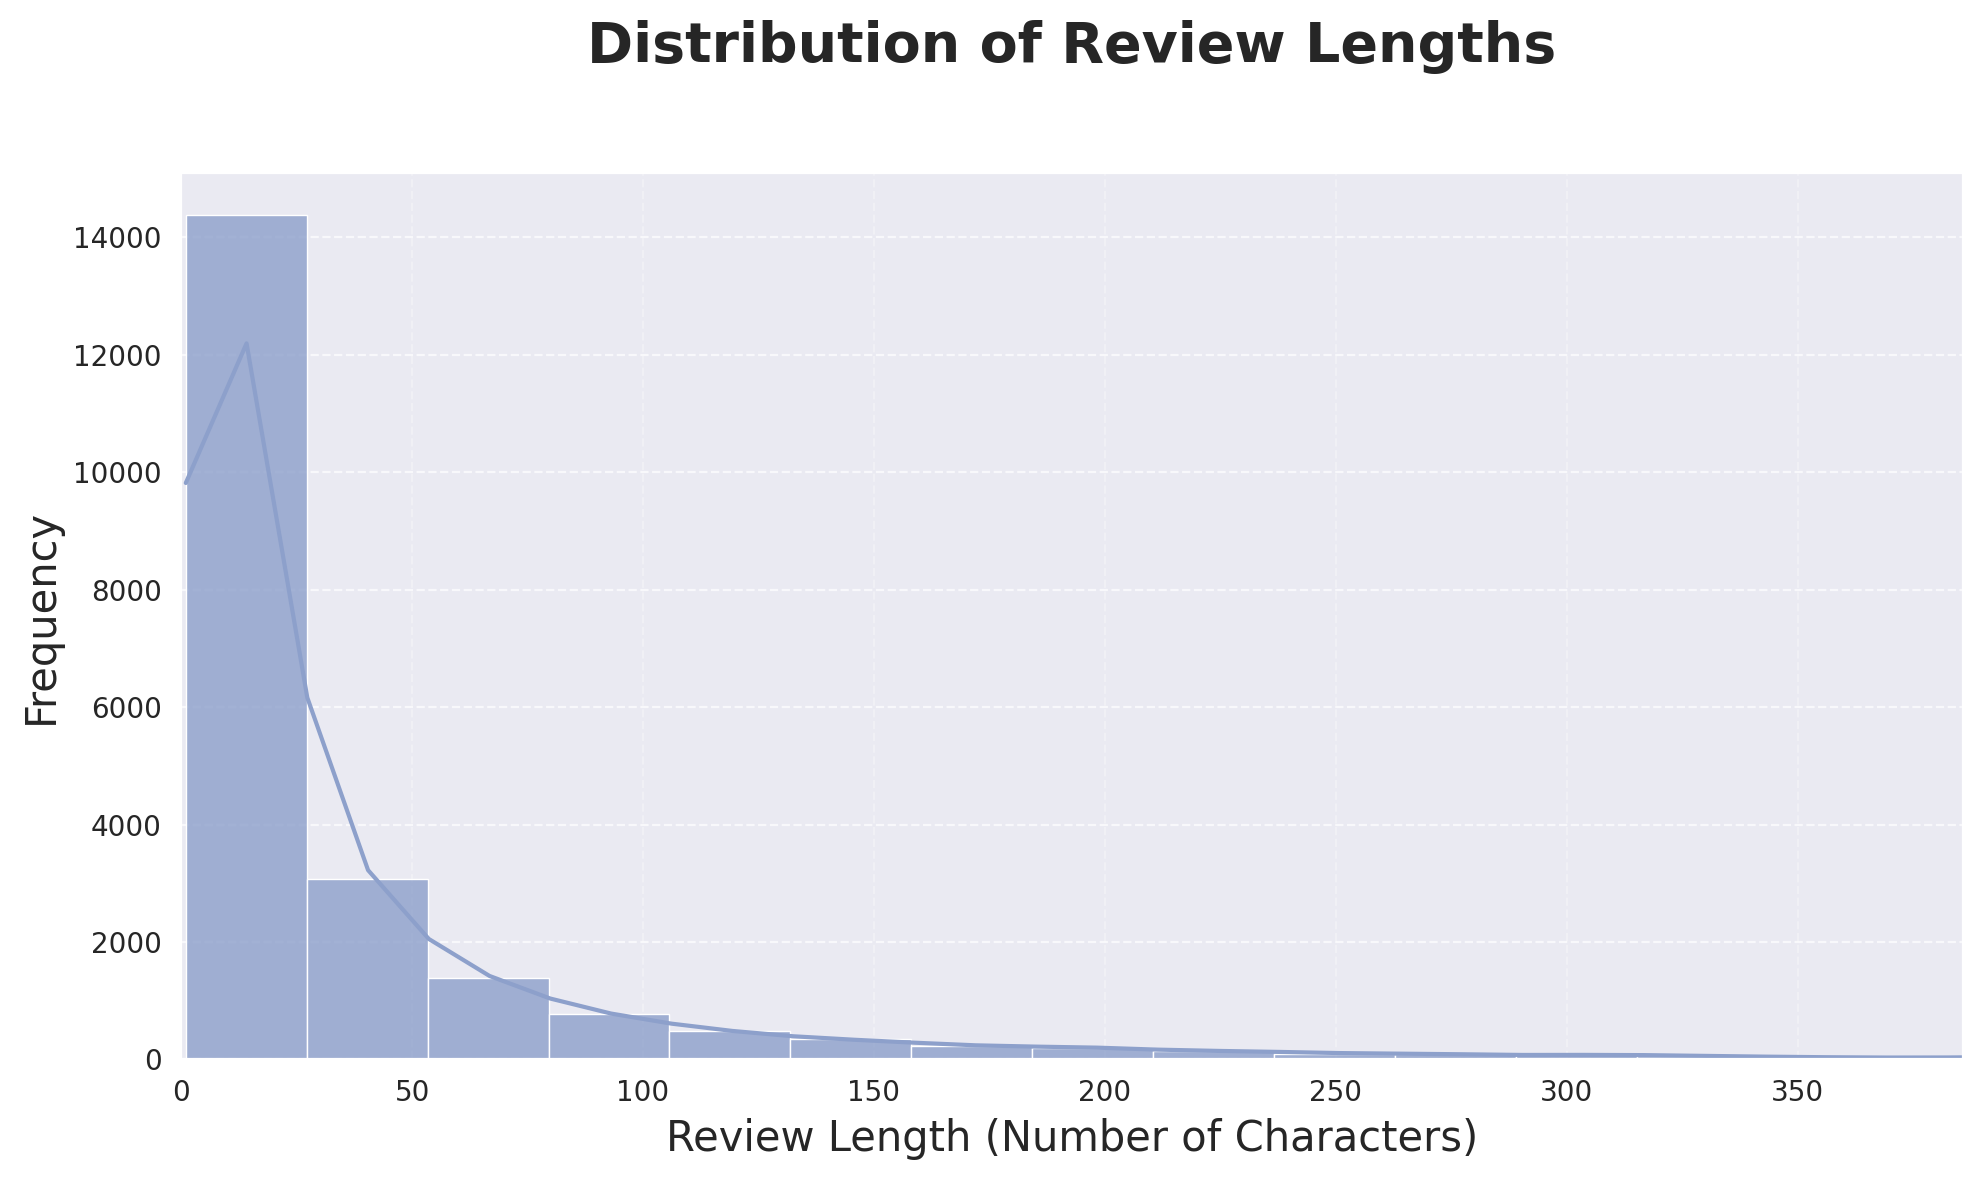


Descriptive Statistics for Review Length:
count    21621.000000
mean        40.278664
std         73.247771
min          1.000000
25%          8.000000
50%         14.000000
75%         40.000000
max       2619.000000
Name: review_length, dtype: float64


In [108]:
# Calculate the length of each review
df_reliverev['review_length'] = df_reliverev['content'].astype(str).apply(len)
plt.figure(figsize=(10, 6)) # Mengatur ukuran plot agar sesuai untuk histogram

# Membuat histogram dengan kurva KDE (Kernel Density Estimate)
sns.histplot(df_reliverev['review_length'], bins=100, kde=True,
             color=sns.color_palette("Set2")[2],
             edgecolor='white',
             linewidth=0.5,
             alpha=0.8)

# Mengatur batas sumbu X (horizontal)
plt.xlim(0, df_reliverev['review_length'].quantile(0.99))

# Menambahkan judul plot dan label sumbu
plt.title('Distribution of Review Lengths', fontsize=20, fontweight='bold', pad=40)
plt.xlabel('Review Length (Number of Characters)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

# Menambahkan gridlines untuk keterbacaan yang lebih baik
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Menyesuaikan tata letak plot untuk memastikan semua elemen pas dan tidak terpotong
plt.tight_layout()

# Menampilkan plot
plt.show()

# Mencetak statistik deskriptif untuk kolom 'review_length'
# Ini memberikan ringkasan angka-angka kunci seperti rata-rata, median, standar deviasi, dll.
print("\nDescriptive Statistics for Review Length:")
print(df_reliverev['review_length'].describe())
